---

# 0 - Imports

---

In [58]:
import pandas as pd
import regex as re 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
from nltk import download
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score
from pickle import dump
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

---

# 1 - Uploading data 

---

In [59]:
ruta = "https://raw.githubusercontent.com/4GeeksAcademy/NLP-project-tutorial/main/url_spam.csv"

df_download = pd.read_csv(ruta)
df_download.to_csv("../data/raw/url_spam.csv", index=False)

df = pd.read_csv("../data/raw/url_spam.csv")
df.head()

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True


In [60]:
print(f'Estas son las dimensiones de nuestro data frame {df.shape}')

Estas son las dimensiones de nuestro data frame (2999, 2)


---

# 2 - Data processing

---

## 2.1 - Transform is_spam to binary

In [61]:
df["is_spam"] = df["is_spam"].apply(lambda x: 1 if x else 0).astype(int)
df.head(5)

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,1
1,https://www.hvper.com/,1
2,https://briefingday.com/m/v4n3i4f3,1
3,https://briefingday.com/n/20200618/m#commentform,0
4,https://briefingday.com/fan,1


## 2.2 - Cleaning duplicates and NaN

In [62]:
df = df.drop_duplicates()
df = df.reset_index(inplace = False, drop = True)

print(f'Estas son las dimensiones de nuestro data frame sin valores duplicados y Nan {df.shape}')

Estas son las dimensiones de nuestro data frame sin valores duplicados y Nan (2369, 2)


## 2.3 - Spam vs NoSpam

In [63]:
df.is_spam.value_counts()

is_spam
0    2125
1     244
Name: count, dtype: int64

Value   -   quantity

0 (No Spam) = 2125

1 (Spam)    = 244

## 2.4 - Texto processing

In [64]:
def preprocess_text(text):
    
    # Remove any character that is not a letter (a-z) or white space ( )
    text = re.sub(r'[^a-z ]', " ", text)
    
    # Remove white spaces
    text = re.sub(r'\s+[a-zA-Z]\s+', " ", text)
    text = re.sub(r'\^[a-zA-Z]\s+', " ", text)

    # Multiple white spaces into one
    text = re.sub(r'\s+', " ", text.lower())

    # Remove tags
    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", text)

    return text.split()

df['text'] = df['url'].apply(preprocess_text)
df.head()

,url,is_spam,text
0,https://briefingday.us8.list-manage.com/unsubs...,1,"[https, briefingday, us, list, manage, com, un..."
1,https://www.hvper.com/,1,"[https, www, hvper, com]"
2,https://briefingday.com/m/v4n3i4f3,1,"[https, briefingday, com, v, i]"
3,https://briefingday.com/n/20200618/m#commentform,0,"[https, briefingday, com, m, commentform]"
4,https://briefingday.com/fan,1,"[https, briefingday, com, fan]"


## 2.5 - World Cloud

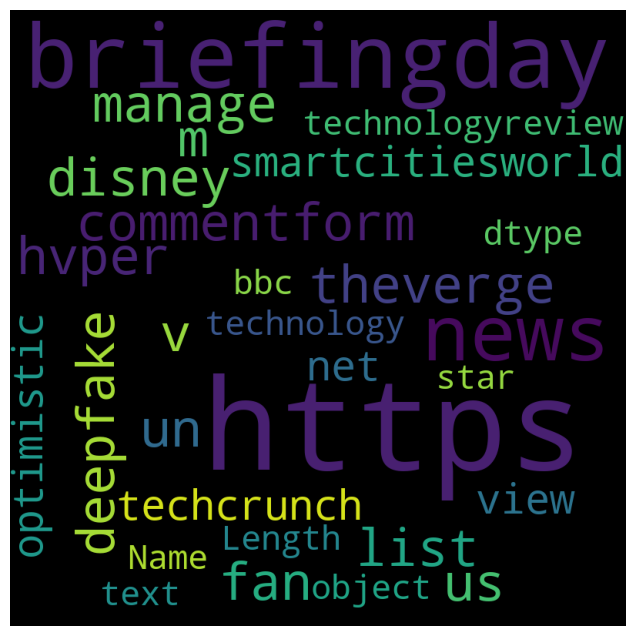

In [65]:
wordcloud = WordCloud(width=800, height=800, background_color="black", max_words=1000, min_font_size=20, random_state=42).generate(str(df["text"]))

fig = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 2.6 - Vectorizer

In [66]:
tokens_list = df["text"]
tokens_list = [" ".join(tokens) for tokens in tokens_list]

vectorizer = TfidfVectorizer(max_features = 5000, max_df = 0.8, min_df = 5)
X = vectorizer.fit_transform(tokens_list).toarray()
y = df["is_spam"]

X[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

---

# 3 - Split / Train and Test 

---

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

---

# 4- Model

---

## 4.1 - Training model

In [68]:
model = SVC(random_state = 42)
model.fit(X_train, y_train)

SVC(random_state=42)

## 4.2 - Predicting

In [69]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [70]:
#Accuracy
print(f"Accuracy score: {round(accuracy_score(y_test, y_pred)*100,3)}%")

Accuracy score: 96.624%


## 4.2 - Hyperparams and Modeling

In [71]:
hyperparams = {
    "C": randint(0.0, 1000),
    "kernel": ["linear", "poly", "rbf", "sigmoid", "precomputed’"],
    "degree": randint(1, 8),
    "gamma": ["scale", "auto"]
}

In [72]:
random_search = RandomizedSearchCV(
    model,
    hyperparams,
    scoring='accuracy',
    cv=5,       
    n_jobs=1,  
    random_state=42
)
random_search

RandomizedSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BF1FE47680>,
                                        'degree': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BF29D9EBA0>,
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid', 'precomputed’']},
                   random_state=42, scoring='accuracy')

In [73]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BF1FE47680>,
                                        'degree': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BF29D9EBA0>,
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid', 'precomputed’']},
                   random_state=42, scoring='accuracy')

In [74]:
print(f"The best hyperparameters are: {random_search.best_params_}")
print(f"Model score: {round(random_search.best_score_ * 100, 2)}%")

The best hyperparameters are: {'C': 560, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
Model score: 92.77%


## 4.3 - Best model

In [75]:
best_model = SVC(C=661, degree=5, gamma='auto', kernel='sigmoid', random_state = 42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print(f"Accuracy Score of the model: {round(accuracy_score(y_test, y_pred)*100, 2)}%")

Accuracy Score of the model: 95.99%


---

# 5 - Saving model

---

In [76]:
from pickle import dump 

dump(model, open('../models/nlp_C_661_degree_5_gamma_auto_kernel_sigmoid.sav', 'wb'))